In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [29]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "suicides_no", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# display sample
filtered_date_df['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Federation', 

In [37]:
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

target_countries_df.head()

,Country,Year,Sex,Age Range,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0.00,830158778


In [38]:
# group by year and country / find averages

country_gdp = target_countries_df.groupby(["Country", "Year"])["GDP(Year)"].mean()
country_suicide = target_countries_df.groupby(["Country", "Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df.head()

,Country,Year,GDP Mean,Suicide Rate Mean
0,Antigua and Barbuda,2000,830158778,3.330833
1,Antigua and Barbuda,2001,800740259,1.620833
2,Antigua and Barbuda,2002,814615333,0.000000
3,Antigua and Barbuda,2003,855643111,2.318333
4,Antigua and Barbuda,2004,919577148,3.005000


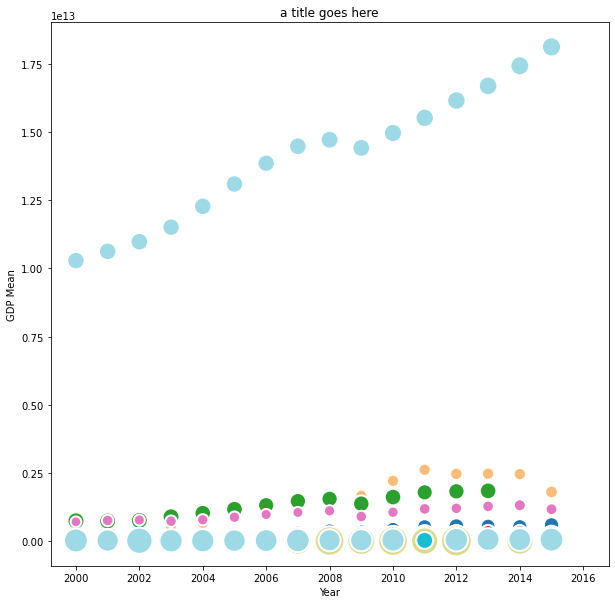

In [54]:

country_summary_reset_df["Country"] = pd.Categorical(country_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
sc = plt.scatter(
    x = country_summary_reset_df["Year"], 
    y = country_summary_reset_df["GDP Mean"], 
    s = (country_summary_reset_df["Suicide Rate Mean"]*25), 
    c = country_summary_reset_df["Country"].cat.codes,
    cmap="tab20",  
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("Year")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);




# Display plot
plt.show()

In [56]:

# Group by Country, Year, Ages / find averages
age_gdp = target_countries_df.groupby(["Country", "Age Range"])["GDP(Year)"].mean()
age_suicide = target_countries_df.groupby(["Country", "Age Range"])['Suicides/100k pop'].mean()

# Create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

age_summary_reset_df = age_summary_df.reset_index()

# Display table
age_summary_reset_df

,Country,Age Range,GDP Mean,Suicide Rate Mean
0,Antigua and Barbuda,05-14,1.096668e+09,0.000000
1,Antigua and Barbuda,15-24,1.096668e+09,0.000000
2,Antigua and Barbuda,25-34,1.096668e+09,0.000000
3,Antigua and Barbuda,35-54,1.096668e+09,1.648929
4,Antigua and Barbuda,55-74,1.096668e+09,3.597500
...,...,...,...,...
157,Uruguay,15-24,3.100206e+10,15.145333
158,Uruguay,25-34,3.100206e+10,17.936000
159,Uruguay,35-54,3.100206e+10,20.285667
160,Uruguay,55-74,3.100206e+10,28.078333


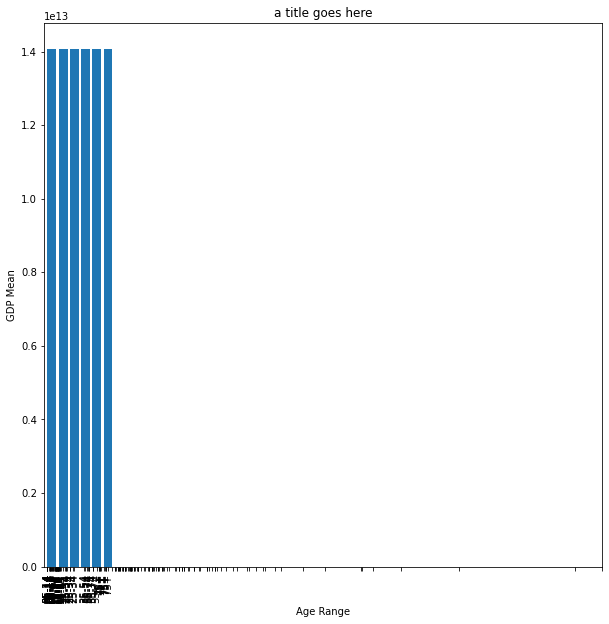

In [71]:

age_summary_reset_df["Country"] = pd.Categorical(age_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot

x = age_summary_reset_df["Age Range"] 
y = age_summary_reset_df["GDP Mean"] 
s= age_summary_reset_df["Suicide Rate Mean"] 
#c= age_summary_reset_df["Country"]



# Add titles (main and on axis)

plt.xlabel("Age Range")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);



plt.bar(x, y, align="edge") 
plt.xticks( s, rotation="vertical")







# Display plot
plt.show()

In [59]:

# Group by Country, Year, Sex / find averages
sex_gdp = target_countries_df.groupby(["Country", "Sex"])["GDP(Year)"].mean()
sex_suicide = target_countries_df.groupby(["Country", "Sex"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

sex_summary_reset_df = sex_summary_df.reset_index()

# Display table
sex_summary_reset_df

,Country,Sex,GDP Mean,Suicide Rate Mean
0,Antigua and Barbuda,female,1.096668e+09,0.185952
1,Antigua and Barbuda,male,1.096668e+09,1.562857
2,Argentina,female,3.455685e+11,3.373229
3,Argentina,male,3.455685e+11,16.998958
4,Bahamas,female,9.703207e+09,0.443929
5,Bahamas,male,9.703207e+09,2.170833
6,Barbados,female,4.021239e+09,0.086548
7,Barbados,male,4.021239e+09,1.583214
8,Belize,female,1.285340e+09,1.792292
9,Belize,male,1.285340e+09,13.167812


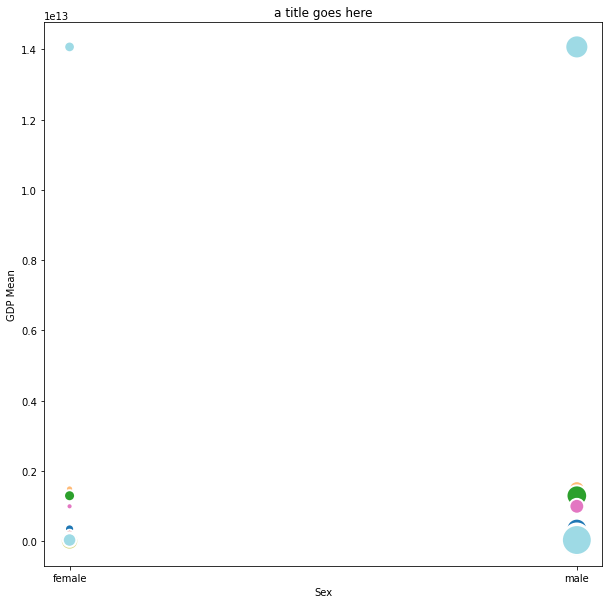

In [60]:
sex_summary_reset_df["Country"] = pd.Categorical(sex_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = sex_summary_reset_df["Sex"], 
    y = sex_summary_reset_df["GDP Mean"], 
    s = (sex_summary_reset_df["Suicide Rate Mean"]*25), 
    c = sex_summary_reset_df["Country"].cat.codes, 
    cmap="tab20", 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)

plt.xlabel("Sex")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [ ]:

#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally

In [ ]:

#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = filtered_date_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

In [ ]:

#Gender v. Country & Suicide rate
Gender_tmp_df = filtered_date_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

In [ ]:
#Age Range v. Country & Suicide rate
Age_tmp_df = filtered_date_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df


In [ ]:
#suicide rates in the United States for 2017-2019?

In [ ]:

#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [ ]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019